## Italian COVID-19 regression study

Original data analysis: [link](https://towardsdatascience.com/italian-covid-19-analysis-with-python-1bdb0e64d5ac)

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
plt.rcParams['figure.figsize'] = (12,10)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")
%matplotlib inline

## Data Sources

In [63]:
italian_data_url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'

In [64]:
## Getting data
data = pd.read_csv(italian_data_url)

# totale_casi = the total number of covid-19 infections 
#               since the epidemics began
tc = data['totale_casi']

# tamponi = the total number of covid-19 swabs since the 
#           epidemics began
tt = data['tamponi']

In [65]:
data.head(5)

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN


In [66]:
tc.head(5)

0    229
1    322
2    400
3    650
4    888
Name: totale_casi, dtype: int64

In [67]:
tt.head(5)

0     4324
1     8623
2     9587
3    12014
4    15695
Name: tamponi, dtype: int64

[[]]

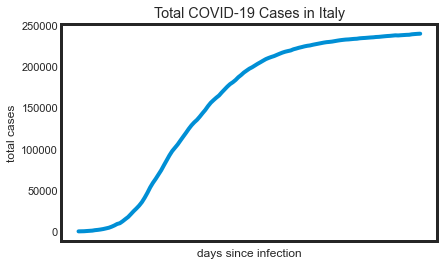

In [68]:
import seaborn as sns

sns.set_style("white")

ax = sns.lineplot(x=data.data, y=data.totale_casi, data=data)
ax.set(title='Total COVID-19 Cases in Italy')
ax.set(xlabel='days since infection', ylabel="total cases")
ax.set(xticklabels='')

In [69]:
# y = calculated Epidemics Progression Index (EPI)
y = []
tt_increase = []
for i in range(1, len(tt)):
 current_epi = (tc[i] - tc[i-1])/(tt[i]-tt[i-1])*100
 tt_increase.append(tt[i]-tt[i-1])
 y.append(current_epi)
data['data']

0      2020-02-24T18:00:00
1      2020-02-25T18:00:00
2      2020-02-26T18:00:00
3      2020-02-27T18:00:00
4      2020-02-28T18:00:00
              ...         
120    2020-06-23T17:00:00
121    2020-06-24T17:00:00
122    2020-06-25T17:00:00
123    2020-06-26T17:00:00
124    2020-06-27T17:00:00
Name: data, Length: 125, dtype: object

Now we calculate the days for which we have data. We could use the variable data['data']. However, this variable is a string, so it is difficult to use it to fit a predictor. Thus we use a generic variable X, which contains a sequence of numbers, from 1 to the total number of samples.

In [70]:
X = []
for i in range(1, len(y)+1):
    X.append([i])

In [71]:
len(X)

124

Plot EPI versus days, as well as two vertical lines, representing the beginning of restriction laws and their effects, respectively.

Now we can plot y versus X, which means plotting EPI versus days. We plot also 2 additional lines: 1) the date corresponding to the beginning of restriction laws, 2) the date when the curve begins to decrease (a week later). These two lines can be understood when the plot is showed.

In Italy restrictions laws began March 9th, which corresponds to the 14th day. In other words it corresponds to the 14 row in the y and X variables. Effects of the restriction laws can be seen after a week from March 9th. Thus they began on the 21st day.


In [72]:
# vertical line corresponding to the beginning of restriction laws. 
di = 14
restrictions_x = [di,di,di,di,di,di]
restrictions_y = [0,10,20,30,40,50]

# vertical line corresponding to the beginning of effects of restriction laws (after a week)
de = di + 7
effects_x = [de,de,de,de,de,de]
effects_y = [0,10,20,30,40,50]
de

21

Let's plot some basic graphs about the progression of the diseases

Now we can plot the graph. We can convert X values to dates through the xticks() function.

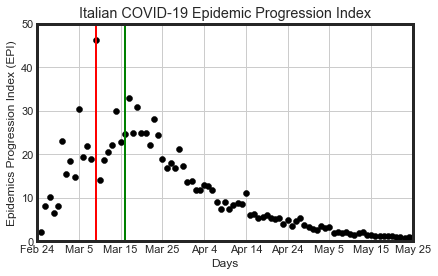

In [73]:
plt.scatter(X, y, color='black')
plt.plot(restrictions_x,restrictions_y, color='red', linewidth=2)
plt.plot(effects_x,effects_y, color='green', linewidth=2)
plt.grid()
plt.xlabel('Days')
plt.title('Italian COVID-19 Epidemic Progression Index')
plt.xlim(0,90)
plt.ylim(0,50)
plt.xticks([0,10,20,30,40,50,60,70,80,90],
 ['Feb 24', 'Mar 5', 'Mar 15', 'Mar 25', 'Apr 4',
  'Apr 14', 'Apr 24', 'May 5', 'May 15', 'May 25'])
plt.ylabel('Epidemics Progression Index (EPI)')
# plt.savefig('EPI-all.png')
plt.show()

We note that EPI begins to decrease from March 16th, i.e. exactly a week after restriction laws. Thus, we can approximate the curve from March 16th with a linear regression, which decreases progressively.

## Building a Single Variable Linear Model

In [74]:
import numpy as np
from sklearn import linear_model
X = X[de:]
y = y[de:]
print(X)
# Linear Regression
linear_regr = linear_model.LinearRegression()
# Train the model using the training sets
linear_regr.fit(X, y)
linear_regr.score(X,y)

[[22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72], [73], [74], [75], [76], [77], [78], [79], [80], [81], [82], [83], [84], [85], [86], [87], [88], [89], [90], [91], [92], [93], [94], [95], [96], [97], [98], [99], [100], [101], [102], [103], [104], [105], [106], [107], [108], [109], [110], [111], [112], [113], [114], [115], [116], [117], [118], [119], [120], [121], [122], [123], [124]]


0.6884313291460508

In [75]:
len(y)

103

In [76]:
len(X)

103

## Predict Future trend

***Use the regressor to predict future trend. Calculate also errors***

Once fitted, we build the linear curve representing data, through function predict() and we calculate the maximum error done by the model through the function max_error() applied to the real values of y and the predicted values y_pred. This error will be used to build two new lines, the max line and minimum line, which will define the ranges between which new samples will move.

In [77]:
from sklearn.metrics import max_error
import math
y_pred = linear_regr.predict(X)
error = max_error(y, y_pred)
error

15.840959245770328

Now we can apply the model to predict EPI for next days. We build a variable X_test, which contains both old days (i.e. days for which data already are available) and future days. We define the variable gp containing the number of previsions days.
Then we apply our model to X_test.

In [78]:
X_test = []
gp = 30
for i in range(de, de + gp):
    X_test.append([i])
y_pred_linear = linear_regr.predict(X_test)

The variable y_pred_linear contains the predicted EPI for next days. However, we should consider also the error made by the model. Thus we build two new variables y_pred_max and y_pred_min containing the y_pred + error and y_pred - error, respectively.

In [102]:
from datetime import datetime
from datetime import timedelta

data_eff = datetime.strptime(data['data'][de], '%Y-%m-%dT%H:%M:%S')
gp=30

date_prev = []
x_ticks = []
step = 5
data_curr = data_eff
x_current = de
n = int(gp/step)
for i in range(0, n):
    date_prev.append(str(data_curr.month) + "/" + str(data_curr.day))
    x_ticks.append(x_current)
    data_curr = data_curr + timedelta(days=step)
    x_current = x_current + step

def plot_EPI_pred(X, y, X_test, y_pred_linear, error):
    y_pred_max = []
    y_pred_min = []
    for i in range(0, len(y_pred_linear)):
        y_pred_max.append(y_pred_linear[i] + error)
        y_pred_min.append(y_pred_linear[i] - error)
        
    plt.grid()
    plt.scatter(X, y, color='black')
    plt.plot(X_test, y_pred_linear, color='green', linewidth=2)
    plt.plot(X_test, y_pred_max, color='red', linewidth=1, linestyle='dashed')
    plt.plot(X_test, y_pred_min, color='red', linewidth=1, linestyle='dashed')
    plt.xlabel('Days')
    plt.xlim(de,de+gp)
    plt.xticks(x_ticks, date_prev)
    plt.ylabel('Epidemics Progression Index (EPI)')
    #plt.yscale('log')
    plt.savefig('EPI-prediction.png')
    plt.show()

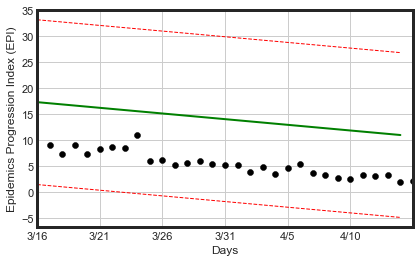

In [103]:
plot_EPI_pred(X, y, X_test, y_pred_linear, error)

## Building a Better Linear Model

In [81]:
from sklearn.preprocessing import PolynomialFeatures

In [82]:
x = [[1],[2],[3]]
x

[[1], [2], [3]]

In [83]:
poly = PolynomialFeatures(2)
x_ = poly.fit_transform(x)
x_

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [84]:
X = []
for i in range(1, len(y)+1):
    X.append([i])
X = X[de:]
y = y[de:]
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [85]:
len(X_poly)

82

In [86]:
len(y)

82

In [87]:
# A better Linear Regression
linear_regr2 = linear_model.LinearRegression()
linear_regr2.fit(X_poly, y)
linear_regr2.score(X_poly, y)

0.9357462564114463

In [88]:
y_pred2 = linear_regr2.predict(X_poly)
error2 = max_error(y, y_pred2)
error2

4.011067429873604

In [95]:
X_test2 = []
gp = 40
for i in range(de, de + gp):
    X_test2.append([i])
poly = PolynomialFeatures(2)
X_test2_poly = poly.fit_transform(X_test2)
y_pred_linear2 = linear_regr2.predict(X_test2_poly)

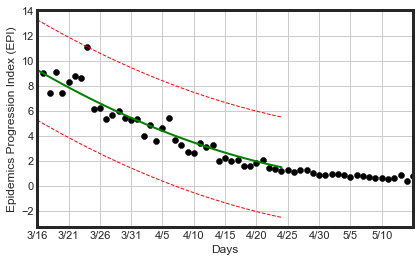

In [99]:
plot_EPI_pred(X, y, X_test2, y_pred_linear2, error2)